<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

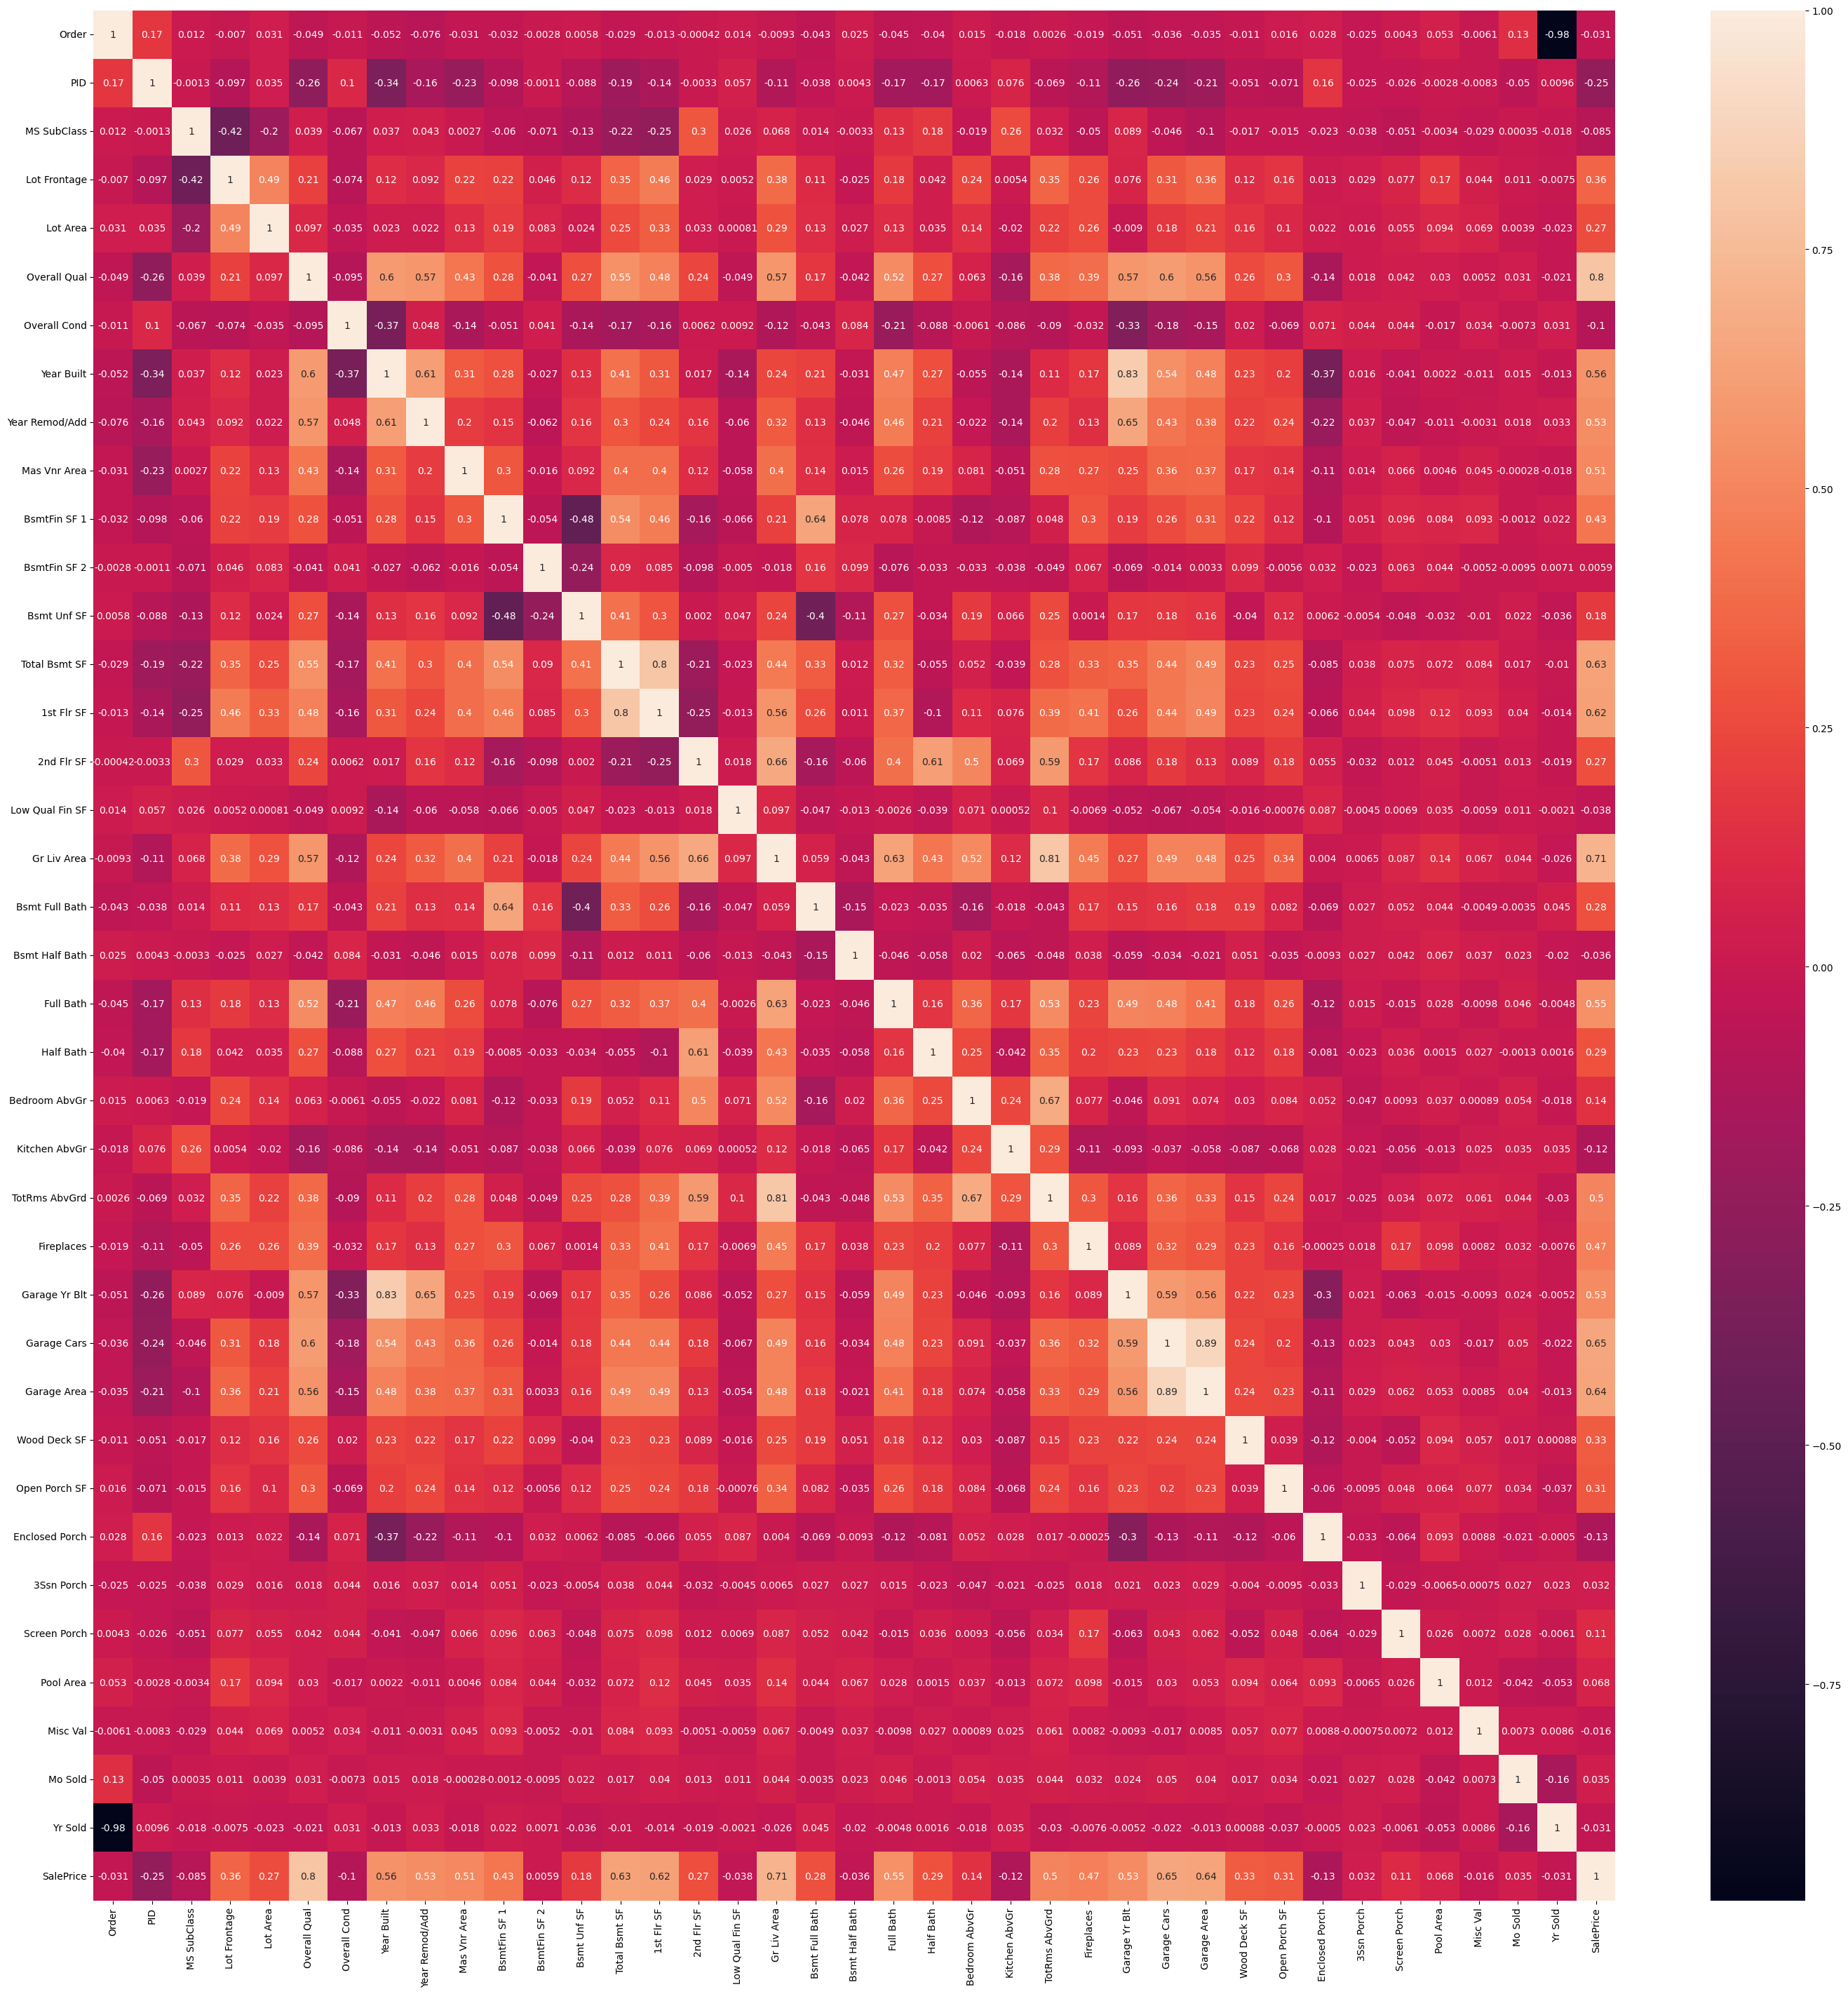

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Houses_data.csv')
df.info()

numeric_df = df.select_dtypes(include='number')
numeric_df.info()

plt.rcParams['figure.figsize']=35,35
corr_heatmap=sns.heatmap(numeric_df.corr(),annot=True)

In [3]:
df=df.drop("Order",axis=1)
df=df.drop("Alley",axis=1)
df=df.drop("Pool QC",axis=1)
df=df.drop("Fence",axis=1)
df=df.drop("Misc Feature",axis=1)
df=df.drop("BsmtFin SF 2",axis=1)

In [4]:
df=df.drop('Misc Val',axis=1)
df=df.drop('3Ssn Porch',axis=1)
df=df.drop('Functional',axis=1)
df=df.drop('Bsmt Full Bath',axis=1)
df=df.drop('Kitchen AbvGr',axis=1)
df=df.drop('Low Qual Fin SF',axis=1)
df=df.drop('Electrical',axis=1)

In [5]:
df=df.drop('Bldg Type',axis=1)
df=df.drop('Condition 2',axis=1)
df=df.drop('Utilities',axis=1)
df=df.drop('Street',axis=1)

In [6]:
categorial_columns_names=df.select_dtypes(exclude='number').columns.tolist()


In [7]:
from sklearn.preprocessing import LabelEncoder
for column_name in categorial_columns_names:
    df[column_name]=df[column_name].fillna('None')
    label_encoder=LabelEncoder()
    df[column_name]=label_encoder.fit_transform(df[column_name])

In [8]:
numerical_columns_names=df.select_dtypes(include='number').columns.tolist()
for column_name in numerical_columns_names:
    df[column_name]=df[column_name].fillna(df[column_name].mean())

In [9]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,5,141.0,31770,0,3,0,0,15,...,210,62,0,0,0,5,2010,9,4,215000
1,526350040,20,4,80.0,11622,3,3,4,0,15,...,140,0,0,120,0,6,2010,9,4,105000
2,526351010,20,5,81.0,14267,0,3,0,0,15,...,393,36,0,0,0,6,2010,9,4,172000
3,526353030,20,5,93.0,11160,3,3,0,0,15,...,0,0,0,0,0,4,2010,9,4,244000
4,527105010,60,5,74.0,13830,0,3,4,0,8,...,212,34,0,0,0,3,2010,9,4,189900


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df)

array([[-0.99716353, -0.87700484,  0.03785598, ...,  0.34164015,
         0.20456589,  0.42822875],
       [-0.99690417, -0.87700484, -1.11754021, ...,  0.34164015,
         0.20456589, -0.94895652],
       [-0.99689903, -0.87700484,  0.03785598, ...,  0.34164015,
         0.20456589, -0.11012549],
       ...,
       [ 1.10724504,  0.64771625,  0.03785598, ...,  0.34164015,
         0.20456589, -0.61092014],
       [ 1.11095437, -0.87700484,  0.03785598, ...,  0.34164015,
         0.20456589, -0.13516523],
       [ 1.11122453,  0.06128506,  0.03785598, ...,  0.34164015,
         0.20456589,  0.09019236]])

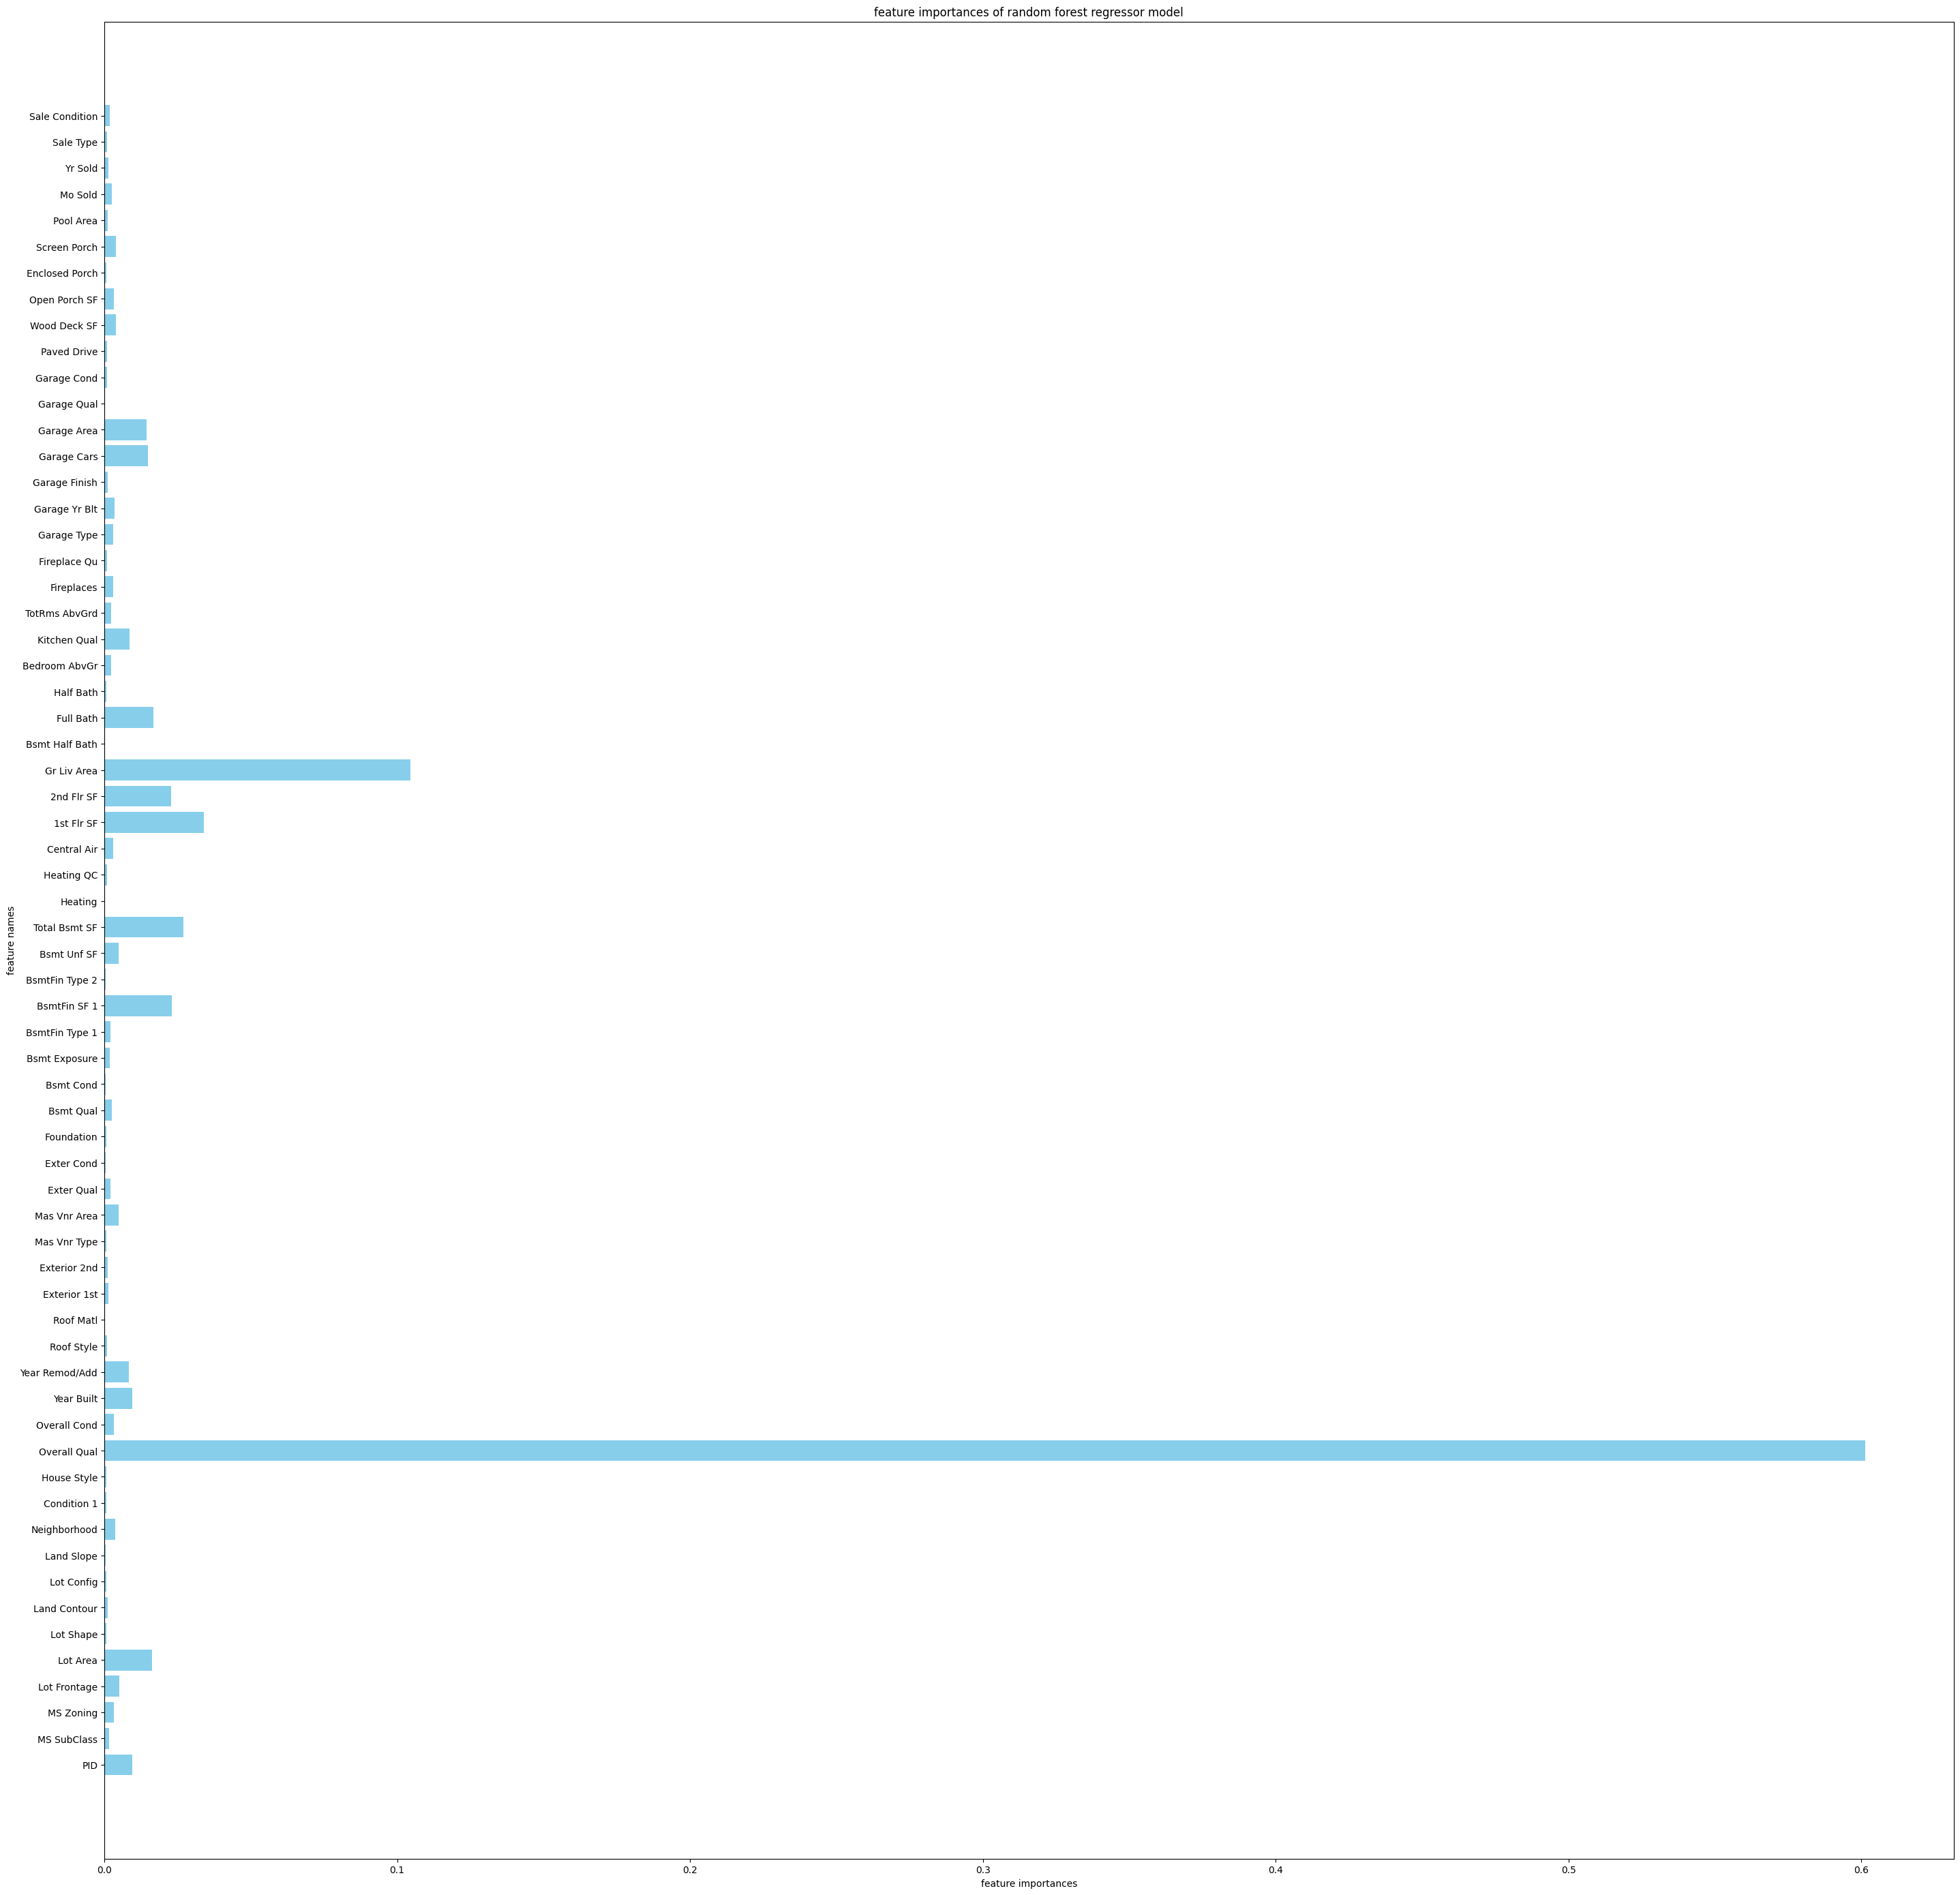

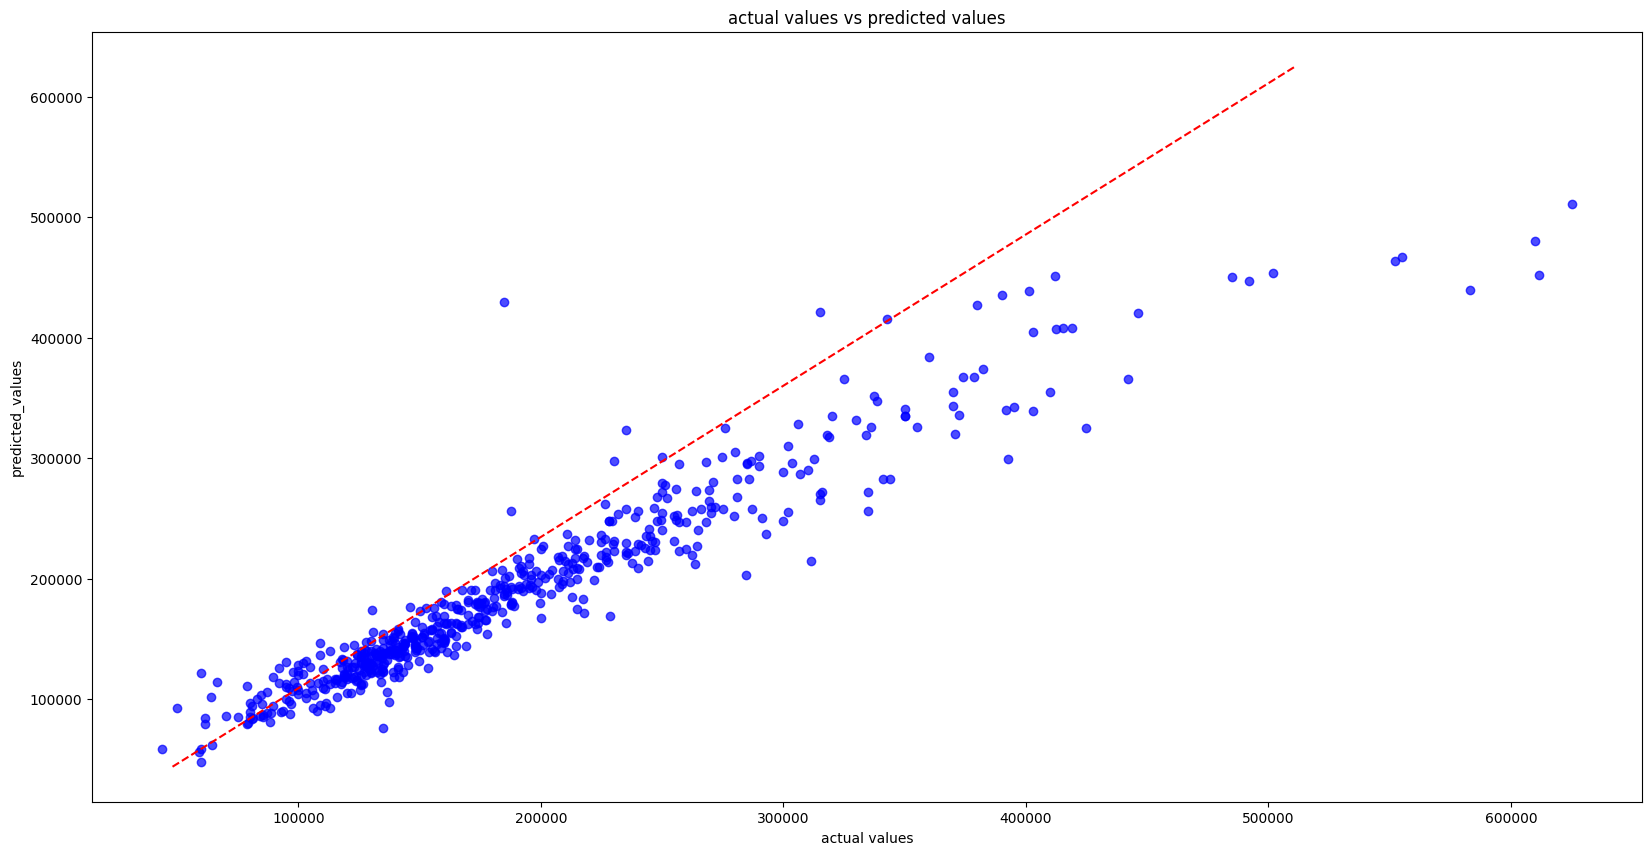

mae: 16036.608566552903
mse: 719155170.4981894
0.9103023546980198


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x=df.drop(columns=['SalePrice'])
feature_names=x.columns.tolist()

y=df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

random_forest_regressor_model=RandomForestRegressor(n_estimators=100,random_state=42)
random_forest_regressor_model.fit(x_train,y_train)

feature_importances=random_forest_regressor_model.feature_importances_
plt.figure(figsize=(35,35))
plt.barh(feature_names,feature_importances,color='skyblue')
plt.ylabel('feature names')
plt.xlabel('feature importances')
plt.title('feature importances of random forest regressor model')
plt.show()

y_pred=random_forest_regressor_model.predict(x_test)

plt.figure(figsize=(20,10))
plt.scatter(y_test,y_pred,alpha=0.7,color='blue')
plt.plot([y_pred.min(),y_pred.max()],[y_test.min(),y_test.max()],'--r')
plt.ylabel('predicted_values')
plt.xlabel('actual values')
plt.title('actual values vs predicted values')
plt.show()

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print('mae:',mae)
print('mse:',mse)

r2core=r2_score(y_test,y_pred)
print(r2core)
